In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
import pickle

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Rainfall.csv")

In [ ]:
print(data)

     day  pressure   maxtemp  temparature  mintemp  dewpoint  humidity   \
0      1     1025.9     19.9         18.3     16.8      13.1         72   
1      2     1022.0     21.7         18.9     17.2      15.6         81   
2      3     1019.7     20.3         19.3     18.0      18.4         95   
3      4     1018.9     22.3         20.6     19.1      18.8         90   
4      5     1015.9     21.3         20.7     20.2      19.9         95   
..   ...        ...      ...          ...      ...       ...        ...   
361   27     1022.7     18.8         17.7     16.9      15.0         84   
362   28     1026.6     18.6         17.3     16.3      12.8         75   
363   29     1025.9     18.9         17.7     16.4      13.3         75   
364   30     1025.3     19.2         17.3     15.2      13.3         78   
365   31     1026.4     20.5         17.8     15.5      13.0         74   

     cloud  rainfall  sunshine           winddirection  windspeed  
0        49      yes       9.3 

In [ ]:
data.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [ ]:
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [ ]:
print(data.max())

day                           31
pressure                  1034.6
maxtemp                     36.3
temparature                 32.4
mintemp                     30.0
dewpoint                    26.7
humidity                      98
cloud                        100
rainfall                     yes
sunshine                    12.1
         winddirection     350.0
windspeed                   59.5
dtype: object


In [ ]:
print(data.min())

day                           1
pressure                  998.5
maxtemp                     7.1
temparature                 4.9
mintemp                     3.1
dewpoint                   -0.4
humidity                     36
cloud                         0
rainfall                     no
sunshine                    0.0
         winddirection     10.0
windspeed                   4.4
dtype: object


In [ ]:
data["rainfall"].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
data["day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
print(data.describe())

              day    pressure      maxtemp  temparature     mintemp  \
count  366.000000   366.000000  366.000000   366.000000  366.000000   
mean    15.756831  1013.742623   26.191257    23.747268   21.894536   
std      8.823592     6.414776    5.978343     5.632813    5.594153   
min      1.000000   998.500000    7.100000     4.900000    3.100000   
25%      8.000000  1008.500000   21.200000    18.825000   17.125000   
50%     16.000000  1013.000000   27.750000    25.450000   23.700000   
75%     23.000000  1018.100000   31.200000    28.600000   26.575000   
max     31.000000  1034.600000   36.300000    32.400000   30.000000   

         dewpoint   humidity       cloud     sunshine           winddirection  \
count  366.000000  366.000000  366.000000  366.000000              365.000000   
mean    19.989071   80.177596   71.128415    4.419399              101.506849   
std      5.997021   10.062470   21.798012    3.934398               81.723724   
min     -0.400000   36.000000    0.0

In [ ]:
print(data.shape)

(366, 12)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [ ]:
data.columns

Index(['day', 'pressure ', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity ', 'cloud ', 'rainfall', 'sunshine', '         winddirection',
       'windspeed'],
      dtype='object')

In [ ]:
data.columns = data.columns.str.strip()

In [ ]:
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [ ]:
print(data.isnull().sum())

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64


In [ ]:
data =data.drop(columns=["day"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pressure       366 non-null    float64
 1   maxtemp        366 non-null    float64
 2   temparature    366 non-null    float64
 3   mintemp        366 non-null    float64
 4   dewpoint       366 non-null    float64
 5   humidity       366 non-null    int64  
 6   cloud          366 non-null    int64  
 7   rainfall       366 non-null    object 
 8   sunshine       366 non-null    float64
 9   winddirection  365 non-null    float64
 10  windspeed      365 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 31.6+ KB


In [ ]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [ ]:
data["winddirection"].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [ ]:
data["winddirection"]=data["winddirection"].fillna(data["winddirection"].mode()[0])
data["windspeed"]= data["windspeed"].fillna(data["windspeed"].median())

In [ ]:
data.isnull().sum()

,0
pressure,0
maxtemp,0
temparature,0
mintemp,0
dewpoint,0
humidity,0
cloud,0
rainfall,0
sunshine,0
winddirection,0


In [ ]:
data["rainfall"].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
data["rainfall"]= data["rainfall"].map({'yes':1,'no':0})

In [ ]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


In [ ]:
sns.set(style="whitegrid")

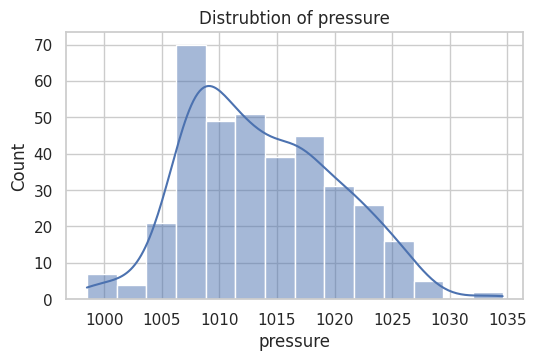

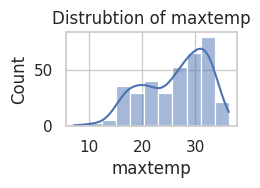

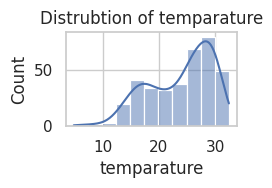

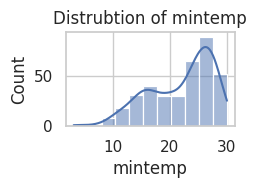

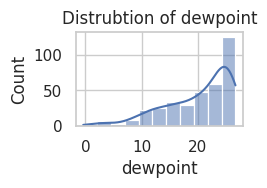

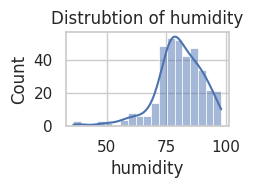

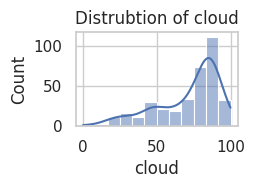

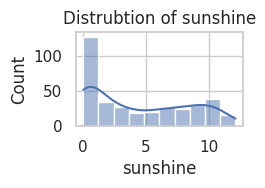

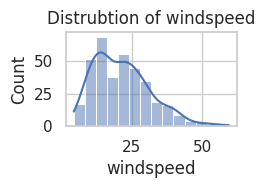

In [ ]:
plt.figure(figsize=(15,10))
for i,column in enumerate(['pressure','maxtemp','temparature','mintemp','dewpoint','humidity','cloud','sunshine','windspeed'],1):
  plt.subplot(3,3,1)
  sns.histplot(data[column],kde=True)
  plt.title(f"Distrubtion of {column}")
  plt.tight_layout()
  plt.show()



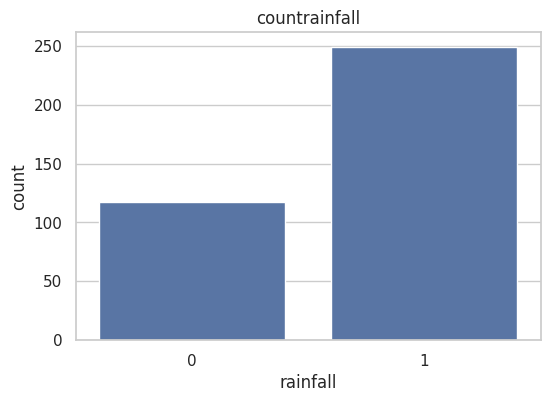

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="rainfall",data=data)
plt.title("countrainfall")
plt.show()

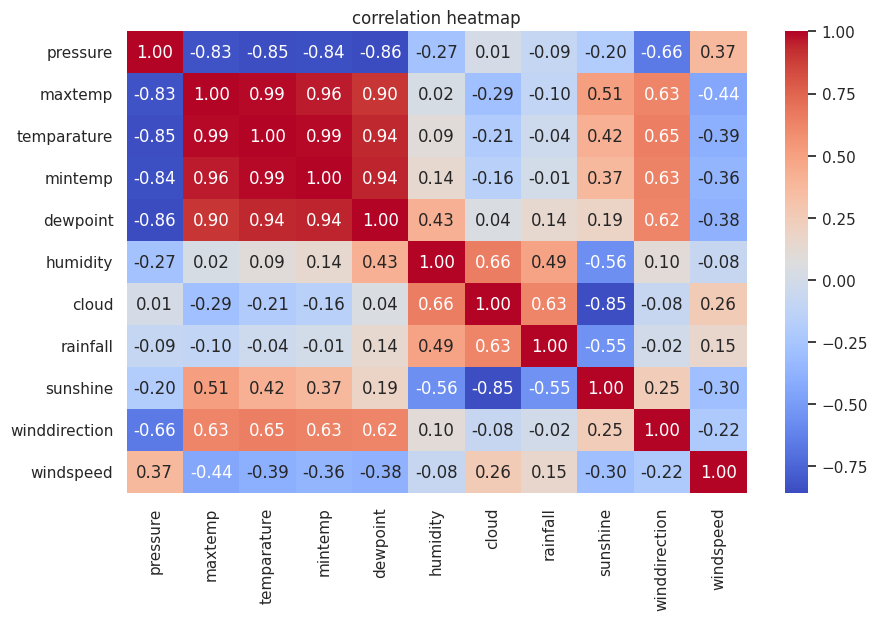

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("correlation heatmap")
plt.show()


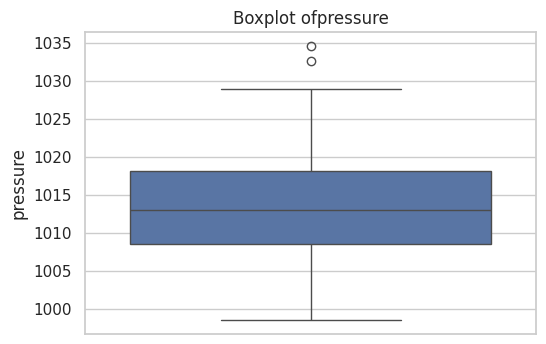

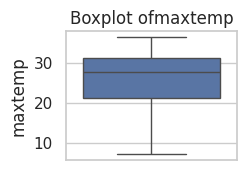

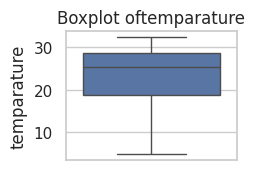

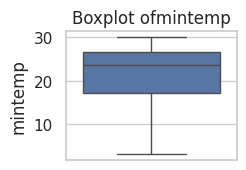

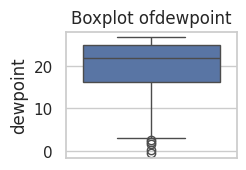

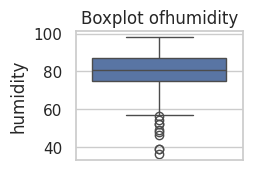

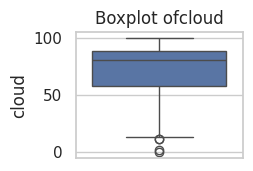

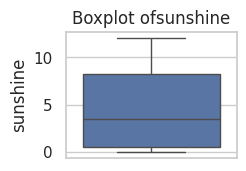

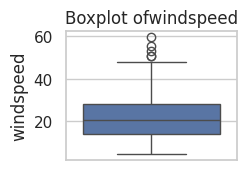

In [ ]:
plt.figure(figsize=(15,10))   #outliers
for i,column in enumerate(['pressure','maxtemp','temparature','mintemp','dewpoint','humidity','cloud','sunshine','windspeed'],1):
  plt.subplot(3,3,1)
  sns.boxplot(data[column])
  plt.title(f"Boxplot of{column}")
  plt.tight_layout()
  plt.show()

In [ ]:
data=data.drop(columns=['maxtemp','temparature','mintemp'])

In [ ]:
data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [ ]:
print(data["rainfall"].value_counts())

rainfall
1    249
0    117
Name: count, dtype: int64


In [ ]:
df_majority=data[data["rainfall"] == 1]
df_minority=data[data["rainfall"] == 0]

In [ ]:
print(df_majority.shape)
print(df_minority.shape)

(249, 8)
(117, 8)


In [ ]:
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

In [ ]:
df_majority_downsampled.shape

(117, 8)

In [ ]:
df_downsampled = pd.concat([df_majority_downsampled,df_minority]) #shuffle the final dataframe

In [ ]:
df_downsampled.shape

(234, 8)

In [ ]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [ ]:
df_downsampled= df_downsampled.sample(frac=1,random_state=42).reset_index(drop=True)

In [ ]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1022.2,14.1,78,90,1,0.0,30.0,28.5
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1007.6,24.8,85,84,1,1.8,70.0,34.8
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


In [ ]:
df_downsampled.value_counts()

pressure  dewpoint  humidity  cloud  rainfall  sunshine  winddirection  windspeed
998.5     24.0      62        55     0         10.8      290.0          17.2         1
1017.2    21.6      82        73     1         1.1       80.0           30.6         1
1015.8    23.3      82        58     1         7.7       50.0           12.8         1
1016.0    23.2      84        20     0         8.2       80.0           7.9          1
1016.1    22.0      80        82     1         6.5       70.0           28.3         1
                                                                                    ..
1010.2    19.3      65        64     1         6.4       10.0           13.2         1
1010.3    25.2      76        29     0         11.4      240.0          14.5         1
          26.1      80        41     0         12.0      130.0          12.4         1
1010.4    23.0      84        78     1         4.6       50.0           12.5         1
1034.6    2.2       61        96     1         0.0       20.0           59.5         1
Name: count, Length: 234, dtype: int64

In [ ]:
df_downsampled["rainfall"].value_counts()

,count
rainfall,
1,117
0,117


In [ ]:
x=df_downsampled.drop(columns=["rainfall"])
y=df_downsampled["rainfall"]                  #split target x(70)and y(30)

In [ ]:
print(x)

     pressure  dewpoint  humidity  cloud  sunshine  winddirection  windspeed
0      1022.2      14.1        78     90       0.0           30.0       28.5
1      1013.4      19.5        69     17      10.5           70.0       12.4
2      1006.1      24.4        74     27      10.8          220.0        8.7
3      1007.6      24.8        85     84       1.8           70.0       34.8
4      1021.2       8.4        66     18      10.1           20.0       24.4
..        ...       ...       ...    ...       ...            ...        ...
229    1008.1      25.4        86     75       5.7           20.0        9.5
230    1010.1      19.9        91     89       0.0           70.0       31.8
231    1020.6      14.7        91     88       0.3           50.0       24.4
232    1008.3      24.1        74     29       5.7           10.0        4.4
233    1005.0      26.1        87     82       2.2          160.0       12.6

[234 rows x 7 columns]


In [ ]:
print(y)

0      1
1      0
2      0
3      1
4      0
      ..
229    1
230    1
231    1
232    0
233    1
Name: rainfall, Length: 234, dtype: int64


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42) #spliting into tarin and test

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    "n_estimators":[50 , 100, 200],
    "max_features":["sqrt", "log2"],
    "max_depth":[None, 10 ,20, 30],
    "min_samples_split":[2 ,5, 10],
    "min_samples_leaf":[1, 2, 4]
}

In [ ]:
grid_search_rf = GridSearchCV(estimator=rf_model,param_grid=param_grid_rf,cv=5,n_jobs=1, verbose=2)
grid_search_rf.fit(x_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [ ]:
best_rf_model = grid_search_rf.best_estimator_
print("best parameter for randomforest:",grid_search_rf.best_params_)

best parameter for randomforest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
cv_scores = cross_val_score(best_rf_model,x_train,y_train,cv=5)
print("cross- validation scores:",cv_scores)
print("mean cross-validation scores:",np.mean(cv_scores))

cross- validation scores: [0.6969697  0.81818182 0.81818182 0.875      0.90625   ]
mean cross-validation scores: 0.8229166666666667


In [ ]:
y_pred =best_rf_model.predict(x_test)
print("test set accuracy:",accuracy_score(y_test,y_pred))
print("test set confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))


test set accuracy: 0.7183098591549296
test set confusion matrix:
 [[21 11]
 [ 9 30]]
classification report:
               precision    recall  f1-score   support

           0       0.70      0.66      0.68        32
           1       0.73      0.77      0.75        39

    accuracy                           0.72        71
   macro avg       0.72      0.71      0.71        71
weighted avg       0.72      0.72      0.72        71



In [ ]:
x.test_size=0.3

In [ ]:
input_data =(1015.9,19.9,95,81,0.0,40.0,13.7)
input_df = pd.DataFrame([input_data],columns=["pressure","dewpoint","humidity","cloud","sunshine","winddirection","windspeed"])

In [ ]:
input_df

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1015.9,19.9,95,81,0.0,40.0,13.7


In [ ]:
prediction = best_rf_model.predict(input_df)
print("prediction result:","Rainfall" if prediction[0] == 1 else "No Rainfall")

prediction result: Rainfall


In [ ]:
model_data = {"model":best_rf_model,"feature_name":x.columns.tolist()}
with open("rainfall_prediction_model.pkl","wb") as file:
  pickle.dump(model_data, file)

In [ ]:
import pickle
import pandas as pd

In [ ]:
with open("rainfall_prediction_model.pkl","rb") as file:
  model_data = pickle.load(file)

In [ ]:
model =model_data["model"]
feature_name = model_data["feature_name"]

In [ ]:
input_data =(1015.9,19.9,95,81,0.0,40.0,13.7)
input_df = pd.DataFrame([input_data],columns=feature_name)


In [ ]:
prediction = best_rf_model.predict(input_df)
print("prediction result:","Rainfall" if prediction[0] == 1 else "No Rainfall")

prediction result: Rainfall


In [ ]:
input_data =(1056.9,19.9,85,78,0.0,40.0,13.7)
input_df = pd.DataFrame([input_data],columns=feature_name)

In [ ]:
prediction = best_rf_model.predict(input_df)
print("prediction result:","Rainfall" if prediction[0] == 1 else "No Rainfall")

prediction result: Rainfall


In [ ]:
input_data =(2367.0,78.8,78.9,99,67.8,56.2,90)
input_df =pd.DataFrame([input_data],columns=feature_name)

In [ ]:
prediction = best_rf_model.predict(input_df)
print("prediction result:","Rainfall" if prediction[0] == 1 else "No Rainfall")

prediction result: No Rainfall


In [ ]:
input_data =(0,0,0,0,0,0,0)
input_df =pd.DataFrame([input_data],columns=feature_name)

In [ ]:
prediction = best_rf_model.predict(input_df)
print("prediction result:","Rainfall" if prediction[0] == 1 else "No Rainfall")

prediction result: No Rainfall


In [ ]:
y_pred =best_rf_model.predict(x_test)
print("test set accuracy:",accuracy_score(y_test,y_pred))
print("test set confusion matrix:\n",confusion_matrix(y_test,y_pred))
print("classification report:\n",classification_report(y_test,y_pred))


test set accuracy: 0.7183098591549296
test set confusion matrix:
 [[21 11]
 [ 9 30]]
classification report:
               precision    recall  f1-score   support

           0       0.70      0.66      0.68        32
           1       0.73      0.77      0.75        39

    accuracy                           0.72        71
   macro avg       0.72      0.71      0.71        71
weighted avg       0.72      0.72      0.72        71

